# 1.1.3 Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

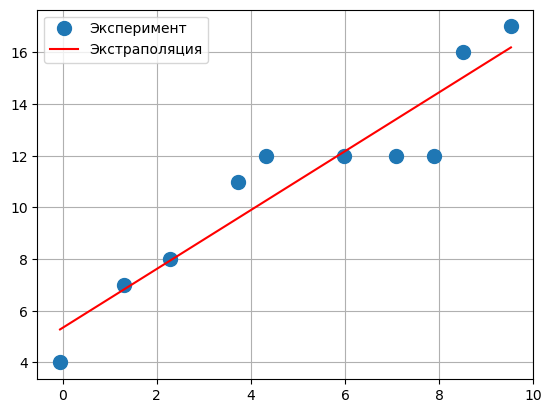

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rnd
from numpy import linalg as lg
from sklearn import linear_model as lm

x = np.array(np.linspace(0,10,10))
x += (rnd.rand(10)-0.5)
y = rnd.randint(1, 20, 10)
y.sort()

A = np.vstack([x, np.ones(len(x))]).T

m,c = lg.lstsq(A, y, rcond = None)[0]

plt.plot(x,y,'o', label="Эксперимент", markersize=10)
plt.plot(x,m*x+c,'r', label="Экстраполяция")
plt.legend()
plt.grid()
plt.show()

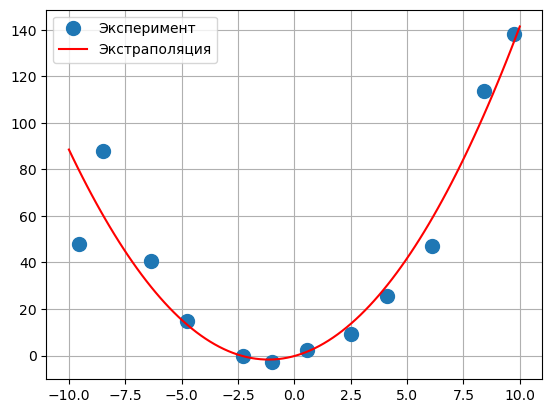

In [10]:
a = rnd.uniform(1,1.5)
b = rnd.uniform(2,3)

x = np.linspace(-10,10,12)
x += (rnd.rand(12)-0.5)
y = [(a+rnd.uniform(-0.5,+0.5))*i**2 + (b+rnd.uniform(-0.5,+0.5))*i + rnd.uniform(-2,2) for i in x]

m = np.vstack([x**2, x, np.ones(len(x))]).T
s = lg.lstsq(m, y, rcond = None)[0]

x_e = np.linspace(-10,10,100)

plt.plot(x,y,'o', label="Эксперимент", markersize=10)
plt.plot(x_e,s[0]*x_e**2+s[1]*x_e+s[2],'r', label="Экстраполяция")
plt.grid()
plt.legend()
plt.show()

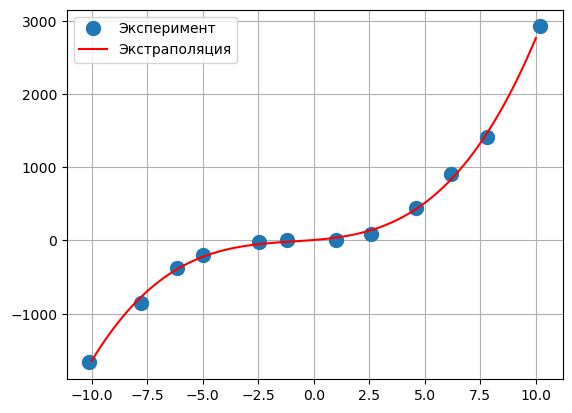

In [11]:
a = rnd.uniform(2,2.5)
b = rnd.uniform(3,7)
c = rnd.uniform(-5,5)

x = np.linspace(-10,10,12)
x += (rnd.rand(12)-0.5)
y = [(a+rnd.uniform(-0.75,+0.75))*i**3 + (b+rnd.uniform(-2,+3))*i**2 + (c+rnd.uniform(-2,+2))*i + rnd.uniform(-2,2) for i in x]

m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
s = lg.lstsq(m, y, rcond = None)[0]

x_e = np.linspace(-10,10,100)

plt.plot(x,y,'o', label="Эксперимент", markersize=10)
plt.plot(x_e,s[0]*x_e**3 + s[1]*x_e**2 + s[2]*x_e + s[3],'r', label="Экстраполяция")
plt.grid()
plt.legend()
plt.show()

# 1.1.5 Задание
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

-0.0002491369992977999
1.8501283946522422


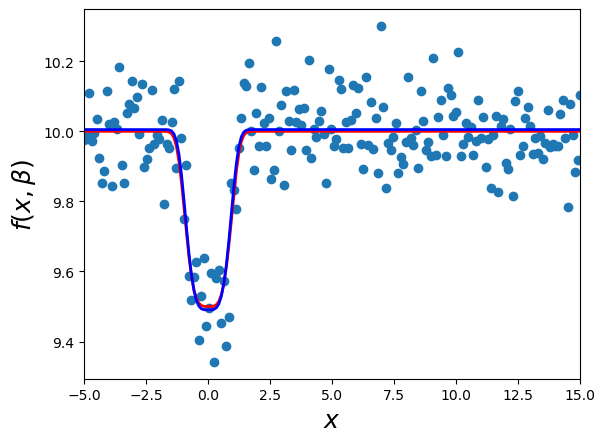

In [12]:
from scipy.optimize import curve_fit
import math

beta = (10, -0.5, 0.9)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x **4)
xdata = np.linspace(-5, 15, 200)
y = f(xdata, *beta)
ydata = y + 0.1 * rnd.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

3.3446371377814384e-05
3.2514119440858873


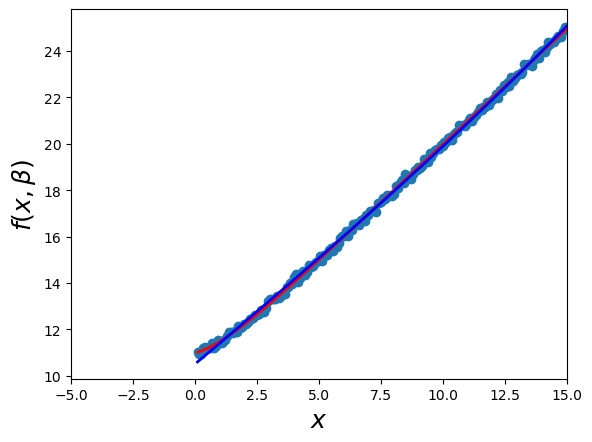

In [13]:
from scipy.optimize import curve_fit
import math

beta = (1, 0.5, 2.3)

def f(x, b0, b1, b2):
    return b0*x + b1**x+math.e**b2
xdata = np.linspace(0.1, 15, 200)
y = f(xdata, *beta)
ydata = y + 0.1 * rnd.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

-1670454456.2314143
2.3765369405804395


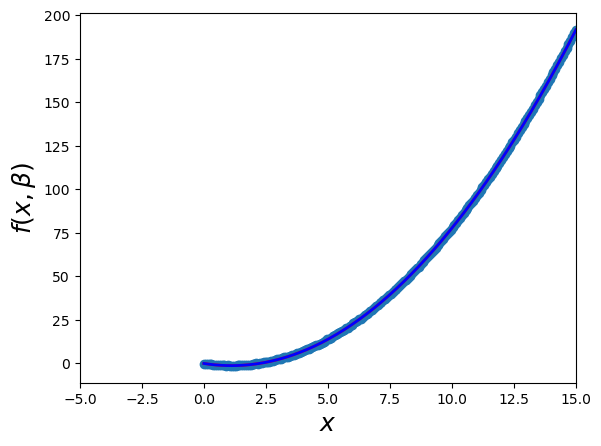

In [14]:
from scipy.optimize import curve_fit
import math

beta = (3, 2, 2.3)

def f(x, b0, b1, b2):
    return x*b0*math.cos(b0) + x**b1 + x*math.sin(b2)
xdata = np.linspace(0, 15, 200)
y = f(xdata, *beta)
ydata = y + 0.1 * rnd.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 1.2.1 задание
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


url="https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
salary = pd.read_csv(url)
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


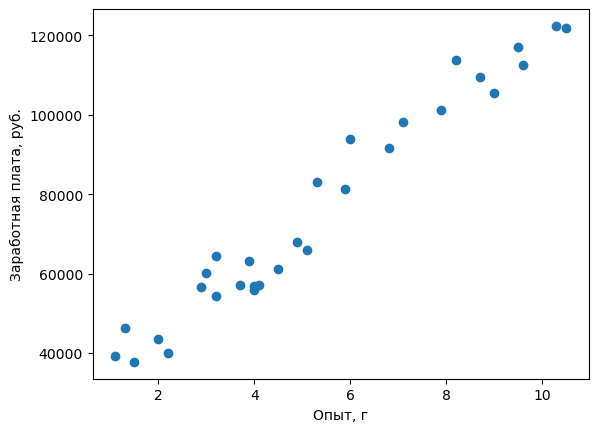

In [44]:
plt.scatter(salary["YearsExperience"],salary["Salary"])
plt.xlabel("Опыт, г")
plt.ylabel("Заработная плата, руб.")
plt.show()

In [39]:
x = salary["YearsExperience"].values
y = salary["Salary"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regress = LinearRegression()
regress.fit(x_train.reshape(-1, 1), y_train)
print("y = ",regress.intercept_," + ",regress.coef_,"x")

y =  26780.09915062817  +  [9312.57512673] x


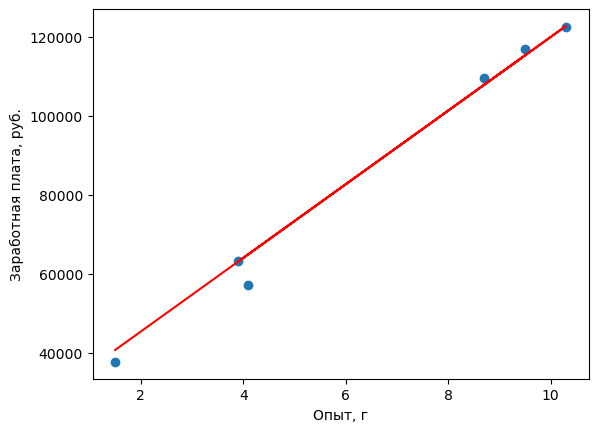

In [45]:
y_pred = regress.predict(x_test.reshape(-1, 1))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = "red")
plt.xlabel("Опыт, г")
plt.ylabel("Заработная плата, руб.")
plt.show()

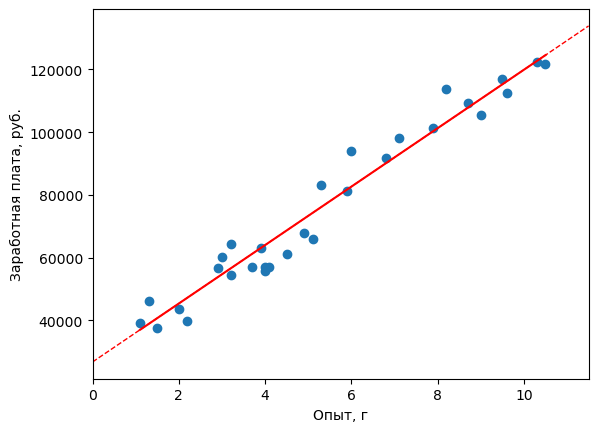

In [53]:
plt.scatter(salary["YearsExperience"],salary["Salary"])
plt.plot([0,max(x)+1], [i*regress.coef_ + regress.intercept_ for i in [0,max(x)+1]], color = "red", linestyle="dashed",linewidth=1)
plt.plot(x, [i*regress.coef_ + regress.intercept_ for i in x], color = "red")
plt.xlim(0, max(x+1))
plt.xlabel("Опыт, г")
plt.ylabel("Заработная плата, руб.")
plt.show()

# 1.3.2 задание
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1) https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2) https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [59]:
from sklearn import metrics

url="https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
wine = pd.read_csv(url)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
X = wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'density','sulphates','alcohol','quality']]
y = wine['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regress = LinearRegression()
regress.fit(X_train, y_train)
coeff = pd.DataFrame(regress.coef_, X.columns, columns=["Coefficient"])
intercept = pd.DataFrame(regress.intercept_, X.columns, columns=["Intercept"])
coeff

In [121]:
print(intercept)

                     Intercept
fixed acidity       -60.990856
volatile acidity    -60.990856
citric acid         -60.990856
residual sugar      -60.990856
chlorides           -60.990856
free sulfur dioxide -60.990856
density             -60.990856
sulphates           -60.990856
alcohol             -60.990856
quality             -60.990856


In [100]:
y_pred = regress.predict(X_test)
frame= pd.DataFrame({'Предсказание': y_test, 'Эксперимент': y_pred})
frame

,Предсказание,Эксперимент
1109,3.17,3.158186
1032,3.36,3.364922
1002,3.26,3.237331
487,3.17,3.246654
979,3.13,2.982179
...,...,...
794,3.17,3.224124
813,3.44,3.399443
1322,3.18,3.167175
704,3.29,3.318369


In [125]:
print("Среднеквадратичная ошибка:",metrics.mean_squared_error(y_test, y_pred))

Среднеквадратичная ошибка: 0.006929344809527662


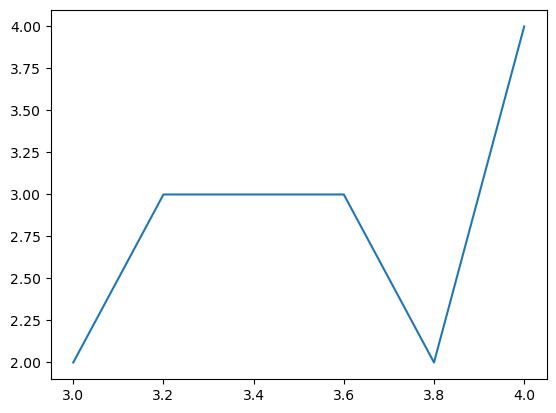

In [130]:
df = pd.DataFrame({'x':[3.0,3.2,3.4,3.6,3.8,4],
                 'y':[2,3,3,3,2,4]})
plt.plot(df['x'],df['y'])

Отклонение:  -1.9047620418349405
Сумма квадратов разностей:  2.133333333333333


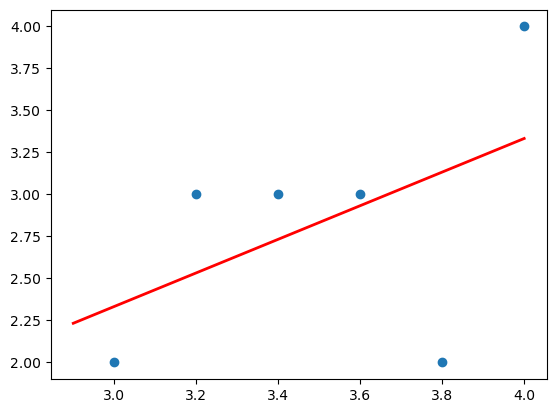

,x,y эксперимент,регрессия
0,3.0,2,2.333333
1,3.2,3,2.533333
2,3.4,3,2.733333
3,3.6,3,2.933333
4,3.8,2,3.133333
5,4.0,4,3.333333


In [177]:
def f(x, b0, b1):
    return b0*x + b1

beta_opt, beta_cov = curve_fit(f, df['x'], df['y'])

lin_dev = sum(beta_cov[0])
print("Отклонение: ", lin_dev)

residuals = df['y'] - f(df['x'], *beta_opt)
fres = sum(residuals**2)
print("Сумма квадратов разностей: ", fres)

plt.scatter(df['x'], df['y'])
x = np.arange(min(df['x'])-0.1,max(df['x'])+0.1,0.1)
plt.plot(x, f(x, *beta_opt), 'r', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

d = pd.DataFrame({"x":df['x'],"y эксперимент":df['y'],"y регрессия":f(df['x'],*beta_opt)})
d

Отклонение:  72.60844748285068
Сумма квадратов разностей:  2.121428571428671


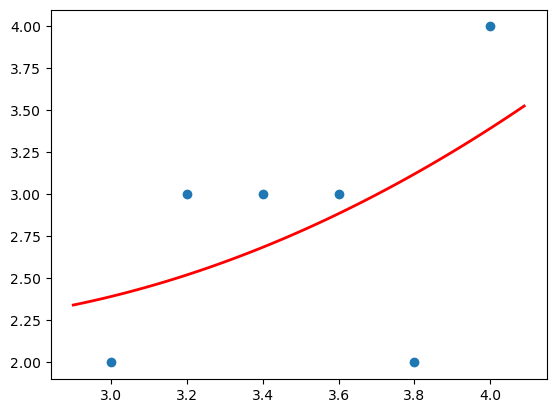

,x,y эксперимент,регрессия
0,3.0,2,2.392857
1,3.2,3,2.521429
2,3.4,3,2.685714
3,3.6,3,2.885714
4,3.8,2,3.121429
5,4.0,4,3.392857


In [178]:
def f(x, b0, b1, b2):
    return b0*x**2 + b1*x + b2

beta_opt, beta_cov = curve_fit(f, df['x'], df['y'])

lin_dev = sum(beta_cov[0])
print("Отклонение: ", lin_dev)

residuals = df['y'] - f(df['x'], *beta_opt)
fres = sum(residuals**2)
print("Сумма квадратов разностей: ", fres)

plt.scatter(df['x'], df['y'])
x = np.arange(min(df['x'])-0.1,max(df['x'])+0.1,0.01)
plt.plot(x, f(x, *beta_opt), 'r', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

d = pd.DataFrame({"x":df['x'],"y эксперимент":df['y'],"y регрессия":f(df['x'],*beta_opt)})
d

Отклонение:  -940.3928558501061
Сумма квадратов разностей:  0.5158730159332973


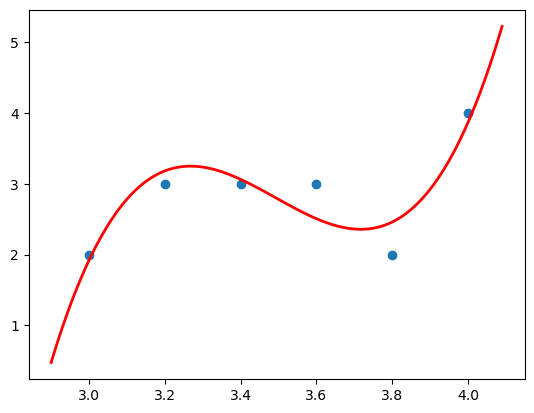

19690614530.15552


,x,y эксперимент,y регрессия
0,3.0,2,1.920638
1,3.2,3,3.182536
2,3.4,3,3.063490
3,3.6,3,2.507939
4,3.8,2,2.460321
5,4.0,4,3.865077


In [180]:
def f(x, b0, b1, b2, b3):
    return b0*x**3 + b1*x**2 + b2*x + b3

beta_opt, beta_cov = curve_fit(f, df['x'], df['y'])

lin_dev = sum(beta_cov[0])
print("Отклонение: ", lin_dev)

residuals = df['y'] - f(df['x'], *beta_opt)
fres = sum(residuals**2)
print("Сумма квадратов разностей: ", fres)

plt.scatter(df['x'], df['y'])
x = np.arange(min(df['x'])-0.1,max(df['x'])+0.1,0.01)
plt.plot(x, f(x, *beta_opt), 'r', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

d = pd.DataFrame({"x":df['x'],"y эксперимент":df['y'],"y регрессия":f(df['x'],*beta_opt)})
d

Отклонение:  34461.98755517154
Сумма квадратов разностей:  0.19444444450840703


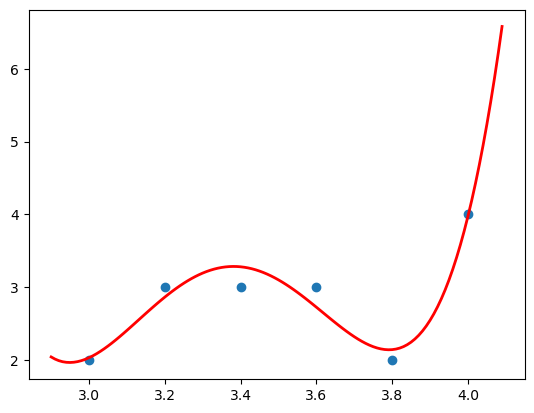

,x,y эксперимент,регрессия
0,3.0,2,2.027777
1,3.2,3,2.861114
2,3.4,3,3.277774
3,3.6,3,2.722220
4,3.8,2,2.138895
5,4.0,4,3.972220


In [167]:
def f(x, b0, b1, b2, b3, b4):
    return b0*x**4 + b1*x**3 + b2*x**2 + b3*x + b4

beta_opt, beta_cov = curve_fit(f, df['x'], df['y'])

lin_dev = sum(beta_cov[0])
print("Отклонение: ", lin_dev)

residuals = df['y'] - f(df['x'], *beta_opt)
fres = sum(residuals**2)
print("Сумма квадратов разностей: ", fres)

plt.scatter(df['x'], df['y'])
x = np.arange(min(df['x'])-0.1,max(df['x'])+0.1,0.01)
plt.plot(x, f(x, *beta_opt), 'r', lw=2)
ax.set_xlim(-5, 15)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

d = pd.DataFrame({"x":df['x'],"y эксперимент":df['y'],"регрессия":f(df['x'],*beta_opt)})
d